# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Loading data

In [2]:
df = pd.read_csv('../data/heart_disease.csv')

df.head()

# drop ID columns
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
if 'dataset' in df.columns:
    df.drop(columns=['dataset'], inplace=True)
if 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

numerical_cols = df.drop("target", axis=1).select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# print column types
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


# Handle missing values

In [3]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mean())

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\alyas\AppData\Local\Temp\ipykernel_13400\1131932175.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0])


# Save Data for Visualizations (Deployment)

In [4]:
df.to_csv('../data/visualized_heart_disease.csv', index=False)

# Data encoding

In [5]:
print(df.shape) # check before encoding
encoders = {}

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # fit on string values
    encoders[col] = le
print(df.shape) # check after encoding


(920, 14)
(920, 14)


# Standarization using StandardScaler

In [6]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.007386,1,3,0.698041,0.311021,1,0,0.495698,0,1.349421,0,-1.249371e+00,0,0
1,1.432034,1,0,1.511761,0.797713,0,0,-1.175955,1,0.589832,1,4.292099e+00,1,2
2,1.432034,1,0,-0.658158,0.274289,0,0,-0.340128,1,1.634267,1,2.444942e+00,2,1
3,-1.752828,1,2,-0.115679,0.467130,0,1,1.968345,0,2.488805,0,-1.249371e+00,1,0
4,-1.328180,0,1,-0.115679,0.044717,0,0,1.371326,0,0.494884,2,-1.249371e+00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,0,0,-0.278423,1.229308,1,2,0.654903,0,-0.834397,1,-2.050756e-16,1,1
916,0.901224,1,3,0.000000,-0.552169,0,2,0.000000,0,0.000000,1,-2.050756e-16,1,0
917,0.158089,1,0,-0.549662,0.219192,1,2,-1.494365,0,-0.834397,1,-2.050756e-16,0,2
918,0.476575,1,0,0.000000,1.706817,1,0,0.000000,0,0.000000,1,-2.050756e-16,1,0


# Exploratory Data Analysis (EDA)

## Histograms

<Figure size 1000x600 with 0 Axes>

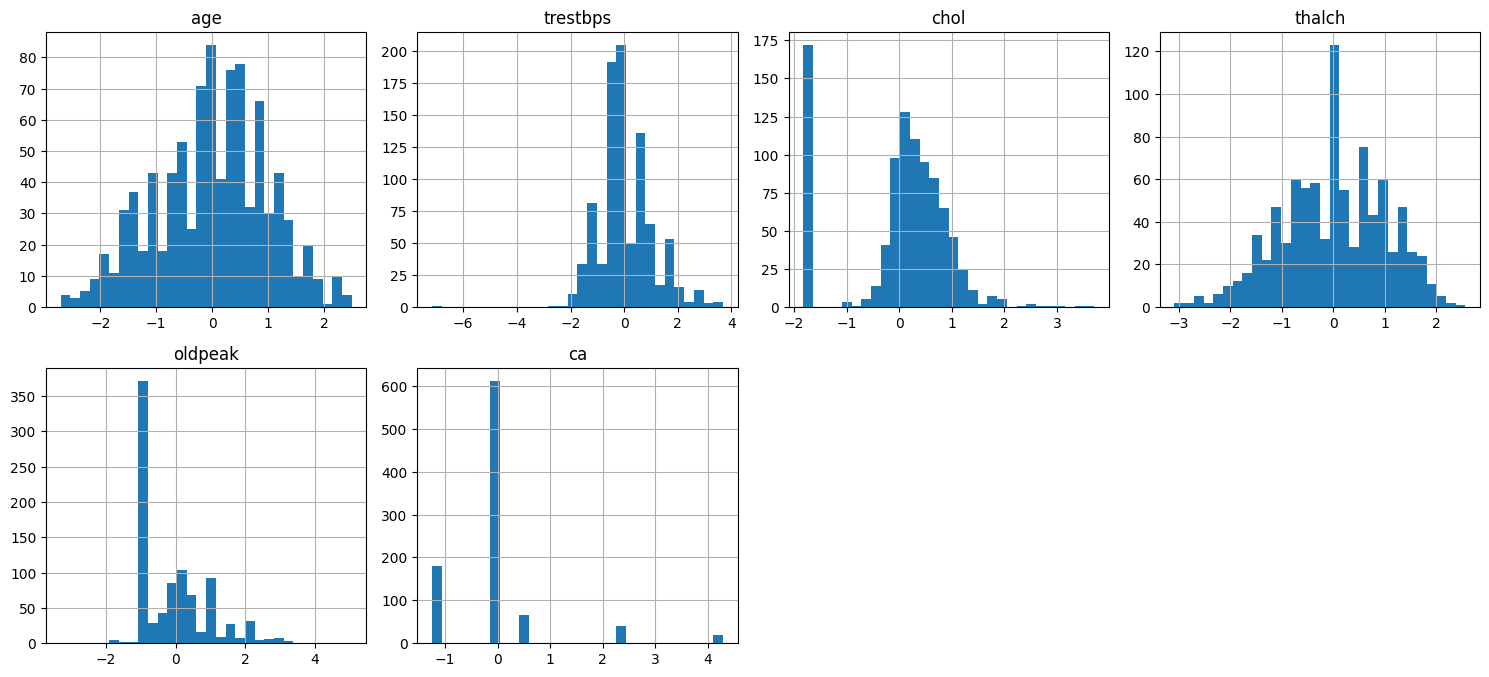

In [7]:
plt.figure(figsize=(10, 6))
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

## Correlation heatmap

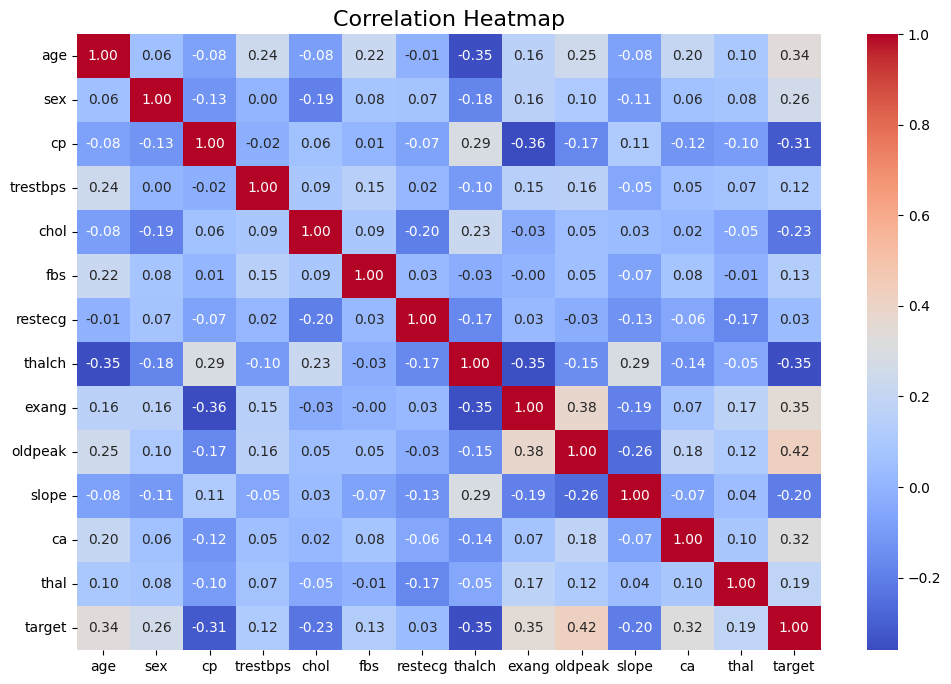

In [8]:
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Boxplots

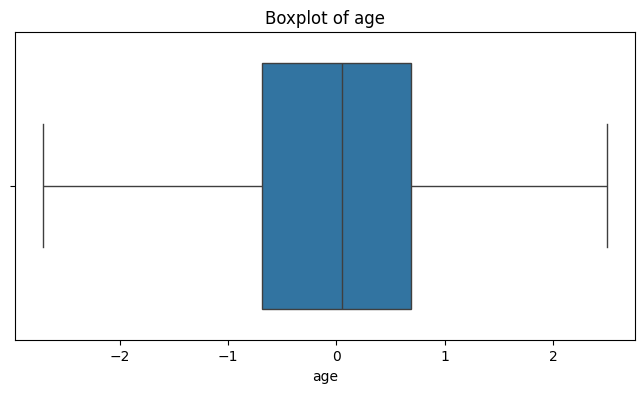

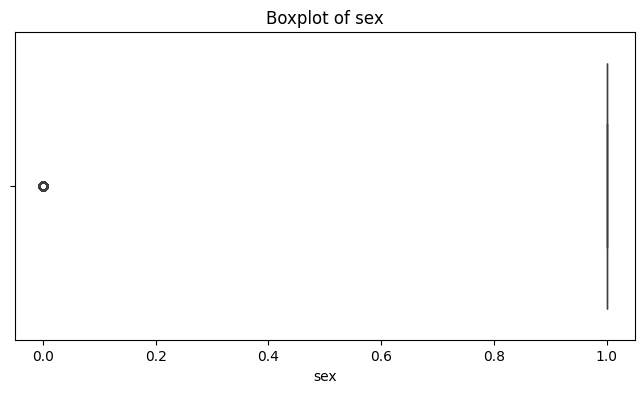

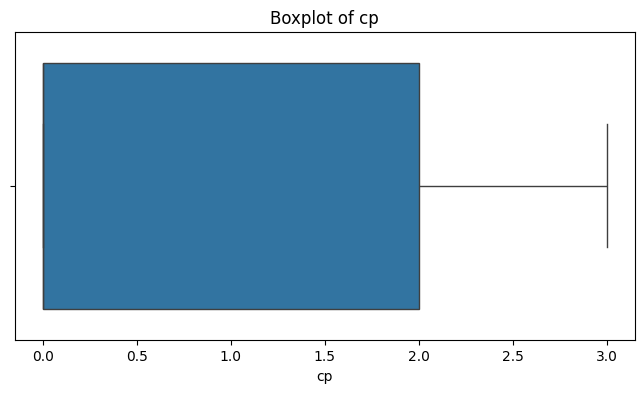

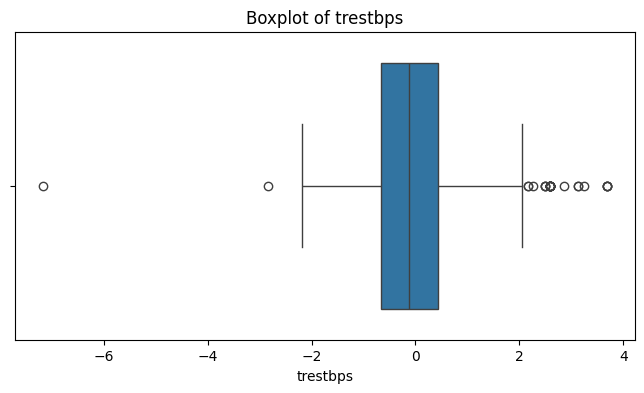

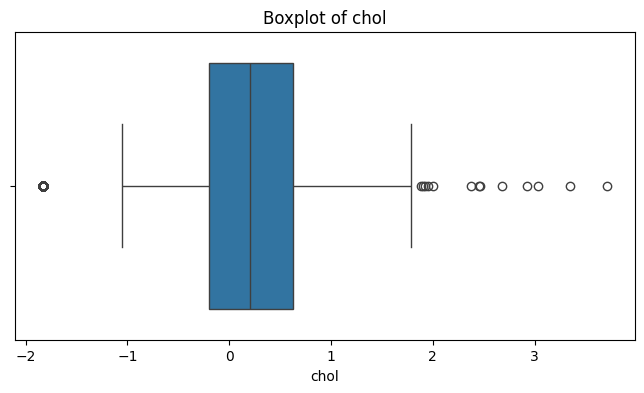

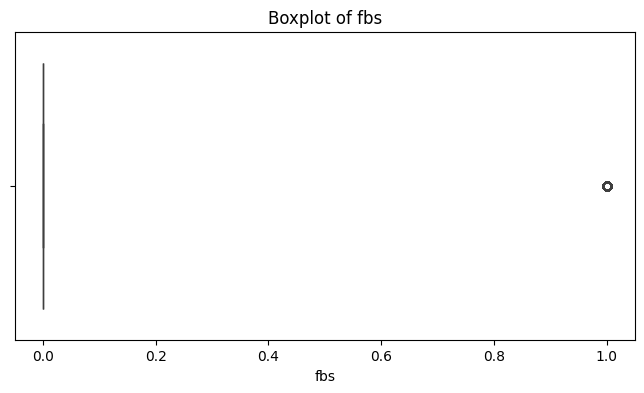

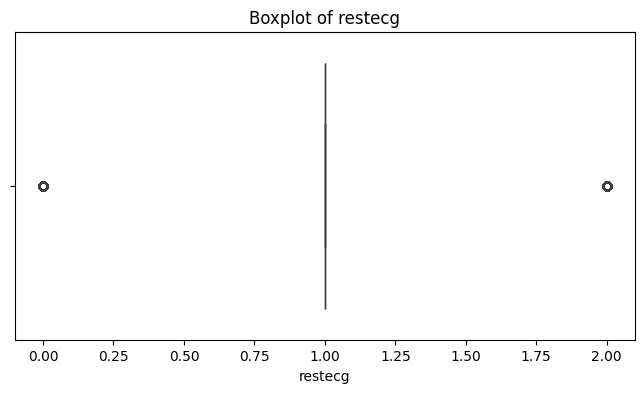

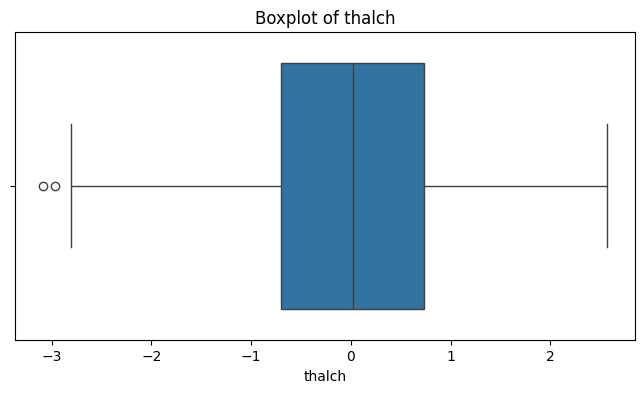

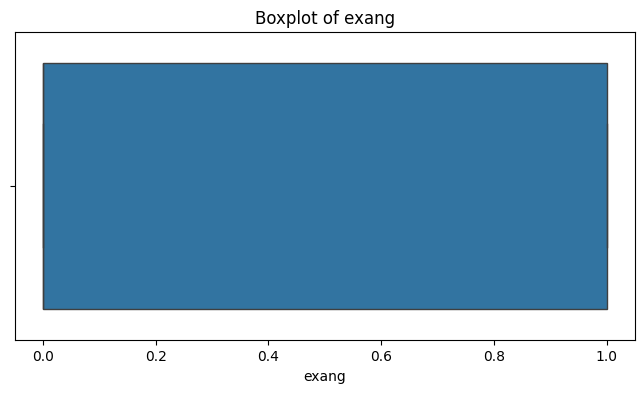

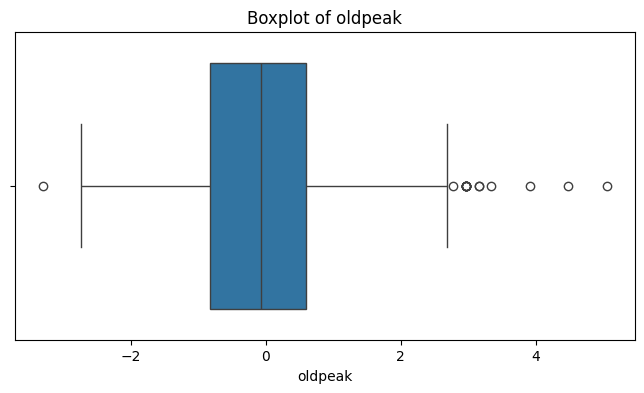

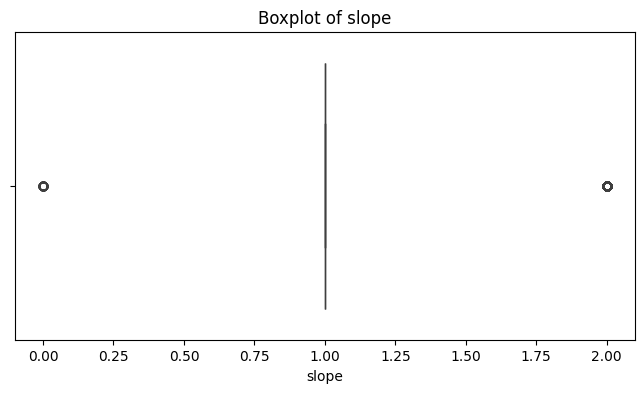

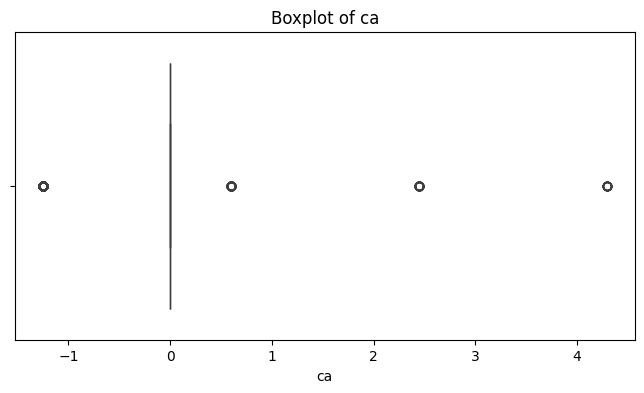

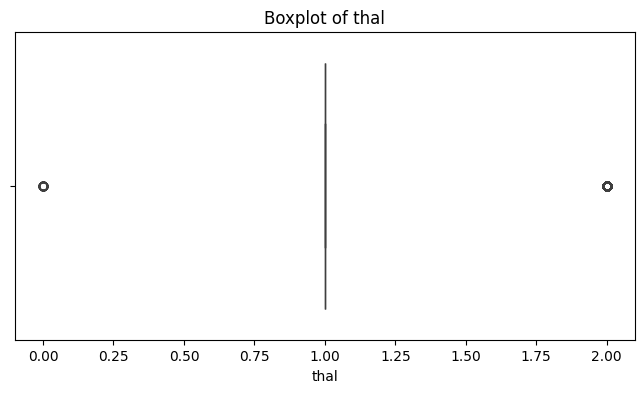

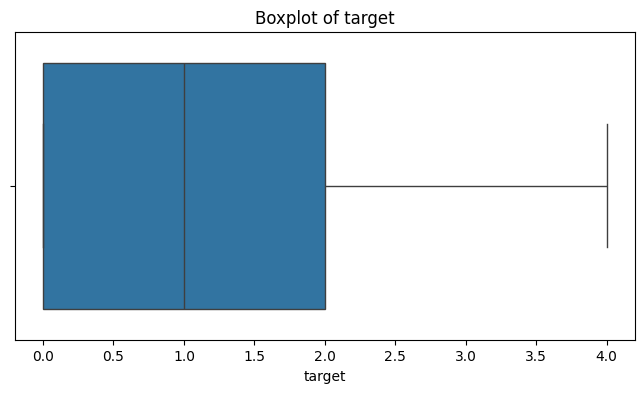

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Make a binary target column

In [10]:
df['has_disease'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Save the cleaned DF

In [11]:
df.to_csv('../data/cleaned_heart_disease.csv', index=False)

# Save the Transformers

In [12]:
# Save all label encoders dict
joblib.dump(encoders, '../models/label_encoders.pkl')

# Scaler
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']